# Assignment - 1
## Task to be Performed:
- Generate a English transliteration of the given Hindi text
- Plot loss grapg for train and test

In [1]:
# importing libraries

# General Libraries
import numpy as np
import pandas as pd
import os
import re
import random
import sklearn
import copy

# For Splitting the data into training and testing
from sklearn.model_selection import train_test_split



# For Plotting data
import matplotlib.pyplot as plt
import seaborn as sns

# Importing natural lenguage toolkit
import nltk

# Tensorflow and keras to run the model on.
import tensorflow as tf
from tensorflow import keras

# Print tensorflow and keras version
print(tf.__version__)
print(keras.__version__)


2.4.0
2.4.0


## Importing Dataset

I have added dataset in colab environment

In [2]:
file_path = '/content/crowd_transliterations.hi-en.txt'

In [3]:
# Loading dataset

dataset = pd.read_csv(file_path,delimiter = "\t",header=None,encoding='utf-8',na_filter = False)
dataset.columns = ['hinglish','hindi']


# To print few lines of the dataset
dataset.head()

,hinglish,hindi
0,hajagiree,हजगिरी
1,chekaanv,चेकॉव
2,spinagaarn,स्पिनगार्न
3,medal,मेडल
4,chetthinaad,चेत्तिनाद


## Data-Preprocessing if required

In [4]:
dataset.shape

# To check the number of rows and columns in our dataset

(14914, 2)

In [5]:
# Check if there are any null values

dataset.isnull().sum()

hinglish    0
hindi       0
dtype: int64

Because we have to transliterate the words from Hindi to English, we will take our Hindi Column as ```Source as 'X'``` and ```Target column which is english as 'y'```

In [6]:
X = dataset['hindi']
y = dataset['hinglish']

## Implementing Some Pre-processing Helper Functions

In [7]:
# Importing Required Libraries

import re
import unicodedata

In [8]:
hindi_alphabets = [chr(alpha) for alpha in range(2304, 2432)]

In [9]:
a_unichr = 'a'
english_alphabets = [ chr(ord(a_unichr)+n) for n in range(26)]

In [10]:
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn')


def preprocess_sentence_hinglish(w):
    w = unicode_to_ascii(w.lower().strip())
    #w = w.replace('-', ' ').replace(',', ' ')
    
    # creating a space between a word and the punctuation following it
    # eg: "he is going home." => "he is going home ." 
    
    #w = re.sub(r"([?.!,¿])", r" \1 ", w)
    #w = re.sub(r'[" "]+', " ", w)
    
    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    w = re.sub(r"[^a-zA-Z?.!,¿]+", "ta", w)
    
    w = w.rstrip().strip()
    w = '@' + w + '#'
    
    return w.split()

def preprocess_sentence_hindi(w):
    w = unicode_to_ascii(w.strip())
    w = w.replace('-', ' ').replace(',', ' ')
    cleaned_line = ''
    for char in w:
        if char in hindi_alphabets or char == ' ':
            cleaned_line += char
#     print(cleaned_line)
#     cleaned_line = cleaned_line.split()
#     print(cleaned_line)
    cleaned_line = cleaned_line.rstrip().strip()
    cleaned_line = '@' + cleaned_line + '#'
    
    return cleaned_line.split()

## Creating a function which gives finally Cleaned and Some-Pre processed data ```preprocessed_dataset```

In [11]:
def create_dataset(hindi_data,hinglish_data):

  '''
  Input:
  hindi_data: we will give the hindi data column as input
  hinglish_data: we will give hinglish data column as input

  output:
  This Function will return us:
  final_hindi_words and final_hinglish_words

  '''

  final_hindi_words = []
  final_hinglish_words = []


  for i in range(len(X)):
    wordlist1 = preprocess_sentence_hindi(hindi_data[i])
    wordlist2 = preprocess_sentence_hinglish(hinglish_data[i])

    for word in wordlist1:
      final_hindi_words.append(word)
    for word in wordlist2:
      final_hinglish_words.append(word)
  

  return final_hindi_words,final_hinglish_words

In [12]:
final_hindi_words,final_hinglish_words = create_dataset(X,y)

In [13]:
# final_hindi_words

In [14]:
# [word for word in final_hinglish_words if len(word)==4]

In [15]:
(final_hindi_words[12000],final_hinglish_words[12000])

('@की#', '@ki#')

In [16]:
len(final_hindi_words),len(final_hinglish_words)

(14914, 14914)

# Creating Dictonary for both the lenguage Hindi and Hinglish.

In [17]:
# creating the list of list of each word in a sentance


hindi_seqlist=[list(word) for word in final_hindi_words]

hinglish_seqlist=[list(word) for word in final_hinglish_words]


In [18]:
from more_itertools import flatten

In [19]:
hindi_charset = set(flatten(hindi_seqlist))
hindi_charset

{'#',
 '@',
 'अ',
 'आ',
 'इ',
 'ई',
 'उ',
 'ऊ',
 'ऋ',
 'ए',
 'ऐ',
 'ऑ',
 'ओ',
 'औ',
 'क',
 'ख',
 'ग',
 'घ',
 'च',
 'छ',
 'ज',
 'झ',
 'ञ',
 'ट',
 'ठ',
 'ड',
 'ढ',
 'ण',
 'त',
 'थ',
 'द',
 'ध',
 'न',
 'प',
 'फ',
 'ब',
 'भ',
 'म',
 'य',
 'र',
 'ल',
 'व',
 'श',
 'ष',
 'स',
 'ह',
 'ा',
 'ि',
 'ी',
 'ॉ',
 'ो',
 'ौ',
 '॥'}

In [20]:
english_charset = set(flatten(hinglish_seqlist))
english_charset

{'#',
 '.',
 '@',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [21]:
hindi_seqlist

[['@', 'ह', 'ज', 'ग', 'ि', 'र', 'ी', '#'],
 ['@', 'च', 'क', 'ॉ', 'व', '#'],
 ['@', 'स', 'प', 'ि', 'न', 'ग', 'ा', 'र', 'न', '#'],
 ['@', 'म', 'ड', 'ल', '#'],
 ['@', 'च', 'त', 'त', 'ि', 'न', 'ा', 'द', '#'],
 ['@', 'ह', 'र', 'ी', '#'],
 ['@', 'भ', 'म', 'ि', '#'],
 ['@', 'थ', 'ॉ', 'म', 'स', 'न', '#'],
 ['@', 'ह', 'न', 'म', 'ा', 'न', '#'],
 ['@', 'अ', 'भ', 'ि', 'न', 'त', 'र', 'ी', '#'],
 ['@', 'ट', '#'],
 ['@', 'स', 'ि', 'क', 'क', 'ि', 'म', '#'],
 ['@', 'अ', 'ब', 'द', 'स', '#'],
 ['@', 'स', 'ल', 'ा', 'म', '#'],
 ['@', 'अ', 'ल', 'व', 'र', '#'],
 ['@', 'क', 'प', 'ि', 'ल', '#'],
 ['@', 'द', 'व', '#'],
 ['@', 'ब', 'ा', 'र', 'फ', 'ल', 'य', 'र', '#'],
 ['@', 'क', 'प', 'ी', 'ल', 'ा', 'न', 'ो', '#'],
 ['@', 'स', 'स', 'प', 'श', 'न', '#'],
 ['@', 'ग', 'र', 'ह', 'म', '#'],
 ['@', 'स', 'ट', 'ी', 'व', 'स', 'न', '#'],
 ['@', 'अ', 'क', 'ल', 'ड', '#'],
 ['@', 'आ', 'र', 'ट', '#'],
 ['@', 'म', 'य', 'ज', 'ि', 'य', 'म', '#'],
 ['@', 'क', 'म', 'ल', 'श', '#'],
 ['@', 'ए', 'फ', 'ी', '#'],
 ['@', 'अ', 'व', 'ा', 'र

In [22]:
hinglish_seqlist

[['@', 'h', 'a', 'j', 'a', 'g', 'i', 'r', 'e', 'e', '#'],
 ['@', 'c', 'h', 'e', 'k', 'a', 'a', 'n', 'v', '#'],
 ['@', 's', 'p', 'i', 'n', 'a', 'g', 'a', 'a', 'r', 'n', '#'],
 ['@', 'm', 'e', 'd', 'a', 'l', '#'],
 ['@', 'c', 'h', 'e', 't', 't', 'h', 'i', 'n', 'a', 'a', 'd', '#'],
 ['@', 'h', 'a', 'r', 'i', '#'],
 ['@', 'b', 'h', 'o', 'o', 'm', 'i', '#'],
 ['@', 'y', 'a', 'a', 'n', 'h', 'm', 's', 'a', 'n', '#'],
 ['@', 'h', 'a', 'n', 'u', 'm', 'a', 'a', 'n', '#'],
 ['@', 'a', 'b', 'h', 'i', 'n', 'e', 't', 'r', 'i', '#'],
 ['@', 't', 'o', '#'],
 ['@', 's', 'i', 'k', 'k', 'i', 'm', '#'],
 ['@', 'a', 'b', 'd', 'u', 's', '#'],
 ['@', 's', 'a', 'l', 'a', 'm', '#'],
 ['@', 'a', 'l', 'v', 'a', 'r', '#'],
 ['@', 'k', 'a', 'p', 'i', 'l', '#'],
 ['@', 'd', 'e', 'v', '#'],
 ['@', 'b', 'a', 'a', 'f', 'l', 'a', 'y', 'e', 'r', '#'],
 ['@', 'c', 'a', 'p', 'i', 'l', 'a', 'n', 'o', '#'],
 ['@', 's', 'u', 's', 'p', 'e', 'n', 's', 'i', 'o', 'n', '#'],
 ['@', 'g', 'r', 'a', 'h', 'a', 'm', '#'],
 ['@', 's', 

## Creating The dictonary of words for both the lenguage 

### In any NLP task First Step is to Create the vocab of the words, so First we will Create the dictonaries like ```vocab_to_index``` and ```index_to_vocab``` for both the lenguages ```hindi``` and ```hinglish``` they are known as ```lookup_tables```

## Function For Lookup Tables

In [23]:
class Word2Index():
  def __init__(self, lang):
    self.lang = lang
    self.word2idx = {}
    self.idx2word = {}
    self.vocab = set()
    
    self.create_index()
    
  def create_index(self):
    for phrase in self.lang:
      for l in phrase:
        self.vocab.update(l)
    
    self.vocab = sorted(self.vocab)
    
    self.word2idx['<pad>'] = 0
    for index, word in enumerate(self.vocab):
      self.word2idx[word] = index + 1
    
    for word, index in self.word2idx.items():
      self.idx2word[index] = word

Checking if we have made correct lookup tables:

In [24]:
def max_length(tensor):
    return max(len(t) for t in tensor)


def load_dataset(final_hindi_words,final_hinglish_words):


    # index language using the class defined above    
    hindi_lang = Word2Index(final_hindi_words)
    hinglish_lang = Word2Index(final_hinglish_words)
    
    # Vectorize the input and target languages
    
    # English words
    input_tensor = [[hindi_lang.word2idx[s] for s in hn] for hn in final_hindi_words]
    
    # hindi words
    target_tensor = [[hinglish_lang.word2idx[s] for s in en] for en in final_hinglish_words]
    
    # Calculate max_length of input and output tensor
    # Here, we'll set those to the longest sentence in the dataset
    max_length_inp, max_length_tar = max_length(input_tensor), max_length(target_tensor)
    
    # Padding the input and output tensor to the maximum length
    input_tensor = tf.keras.preprocessing.sequence.pad_sequences(input_tensor, 
                                                                 maxlen=max_length_inp,
                                                                 padding='post')
    
    target_tensor = tf.keras.preprocessing.sequence.pad_sequences(target_tensor, 
                                                                  maxlen=max_length_tar, 
                                                                  padding='post')
    
    return input_tensor, target_tensor, hindi_lang, hinglish_lang, max_length_inp, max_length_tar

In [25]:
hindi_tensor, hinglish_tensor, hindi_lang, hinglish_lang, max_length_hindi, max_length_hinglish = load_dataset(final_hindi_words,final_hinglish_words)

In [26]:
hindi_tensor[0]

array([ 2, 46, 21, 17, 48, 40, 49,  1,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32)

In [27]:
hinglish_tensor[0]

array([ 3, 11,  4, 13,  4, 10, 12, 21,  8,  8,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0], dtype=int32)

In [28]:
max_length_hindi

16

In [29]:
max_length_hinglish

20

In [30]:
hindi_tensor.shape

(14914, 16)

In [31]:
hinglish_tensor.shape

(14914, 20)

In [32]:
# create lookup tables for English and Hindi data

hindi_vocab_to_int, hindi_int_to_vocab = hindi_lang.word2idx,hindi_lang.idx2word
hinglish_vocab_to_int, hinglish_int_to_vocab = hinglish_lang.word2idx,hinglish_lang.idx2word

In [33]:
hindi_vocab_to_int

{'#': 1,
 '<pad>': 0,
 '@': 2,
 'अ': 3,
 'आ': 4,
 'इ': 5,
 'ई': 6,
 'उ': 7,
 'ऊ': 8,
 'ऋ': 9,
 'ए': 10,
 'ऐ': 11,
 'ऑ': 12,
 'ओ': 13,
 'औ': 14,
 'क': 15,
 'ख': 16,
 'ग': 17,
 'घ': 18,
 'च': 19,
 'छ': 20,
 'ज': 21,
 'झ': 22,
 'ञ': 23,
 'ट': 24,
 'ठ': 25,
 'ड': 26,
 'ढ': 27,
 'ण': 28,
 'त': 29,
 'थ': 30,
 'द': 31,
 'ध': 32,
 'न': 33,
 'प': 34,
 'फ': 35,
 'ब': 36,
 'भ': 37,
 'म': 38,
 'य': 39,
 'र': 40,
 'ल': 41,
 'व': 42,
 'श': 43,
 'ष': 44,
 'स': 45,
 'ह': 46,
 'ा': 47,
 'ि': 48,
 'ी': 49,
 'ॉ': 50,
 'ो': 51,
 'ौ': 52,
 '॥': 53}

In [34]:
hinglish_vocab_to_int

{'#': 1,
 '.': 2,
 '<pad>': 0,
 '@': 3,
 'a': 4,
 'b': 5,
 'c': 6,
 'd': 7,
 'e': 8,
 'f': 9,
 'g': 10,
 'h': 11,
 'i': 12,
 'j': 13,
 'k': 14,
 'l': 15,
 'm': 16,
 'n': 17,
 'o': 18,
 'p': 19,
 'q': 20,
 'r': 21,
 's': 22,
 't': 23,
 'u': 24,
 'v': 25,
 'w': 26,
 'x': 27,
 'y': 28,
 'z': 29}

# Now, let's Build the Model.


In [35]:
from sklearn.model_selection import train_test_split

## Split the data into train and test

In [36]:
hindi_tensor_train, hindi_tensor_test, hinglish_tensor_train,hinglish_tensor_test = train_test_split(hindi_tensor, hinglish_tensor, test_size=0.10,random_state=42)

In [37]:
len(hindi_tensor_train),len(hindi_tensor_test),len(hinglish_tensor_train),len(hinglish_tensor_test)

(13422, 1492, 13422, 1492)

In [38]:
max_length_hindi,max_length_hinglish

(16, 20)

# Defining Bidirectional LSTM Models for Neural Machine Traslation

## Let's Define the Model

In [39]:
from keras.models import Model, Input,Sequential
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional,RepeatVector,add
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

## Setting-up Hyper parameters

In [40]:
hindi_vocab_size = len(hindi_vocab_to_int)+1
hinglish_vocab_size = len(hinglish_vocab_to_int)+1

hindi_vocab_size,hinglish_vocab_size


(55, 31)

In [41]:
max_length_hindi,max_length_hinglish

(16, 20)

In [42]:
hindi_tensor.shape

(14914, 16)

In [43]:
hinglish_tensor.shape

(14914, 20)

In [44]:
hindi_tensor_train.shape[1:]

(16,)

# Defining Model

In [45]:
def model_final(input_shape, output_sequence_length, hindi_vocab_size, hinglish_vocab_size):
    """
    Build and train a model that incorporates embedding, encoder-decoder, and bidirectional RNN
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param hindi_vocab_size: Number of unique hindi words in the dataset
    :param hinglish_vocab_size: Number of unique english words in the dataset
    :return: Keras model built, but not trained
    """
    # Hyperparameters
    learning_rate = 0.003
    
    # Build the layers    
    model = Sequential()
    # Embedding
    model.add(Embedding(hindi_vocab_size, 128, input_length=input_shape[1],
                         input_shape=input_shape[1:]))
    # Encoder
    model.add(Bidirectional(LSTM(128)))
    model.add(RepeatVector(output_sequence_length))
    # Decoder
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(TimeDistributed(Dense(512, activation='relu')))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(hinglish_vocab_size, activation='softmax')))
    
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=keras.optimizers.RMSprop(learning_rate),
                  metrics=['accuracy'])
    return model

In [46]:
print(hindi_tensor_train.shape)
print(hinglish_tensor_train.shape)

(13422, 16)
(13422, 20)


In [47]:
model = model_final(hindi_tensor_train.shape,hinglish_tensor_train.shape[1],hindi_vocab_size,hinglish_vocab_size)
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 128)           7040      
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 20, 256)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 20, 256)           394240    
_________________________________________________________________
time_distributed (TimeDistri (None, 20, 512)           131584    
_________________________________________________________________
dropout (Dropout)            (None, 20, 512)           0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 20, 31)            1

## Fitting The Model

In [48]:
checkpoint = ModelCheckpoint('NMT_model.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_accuracy',patience=2,verbose = 1, mode ='max',restore_best_weights = True)


history = model.fit(hindi_tensor_train, hinglish_tensor_train, batch_size=128,validation_split=0.2,epochs=25,callbacks = [checkpoint,early_stopping])

Epoch 1/25
84/84 [==============================] - 42s 409ms/step - loss: 2.1803 - accuracy: 0.5587 - val_loss: 1.2833 - val_accuracy: 0.6692

Epoch 00001: val_loss improved from inf to 1.28335, saving model to NMT_model.hdf5
Epoch 2/25
84/84 [==============================] - 33s 390ms/step - loss: 1.3081 - accuracy: 0.6673 - val_loss: 1.0487 - val_accuracy: 0.7055

Epoch 00002: val_loss improved from 1.28335 to 1.04872, saving model to NMT_model.hdf5
Epoch 3/25
84/84 [==============================] - 33s 389ms/step - loss: 1.1196 - accuracy: 0.6909 - val_loss: 1.2673 - val_accuracy: 0.6952

Epoch 00003: val_loss did not improve from 1.04872
Epoch 4/25
84/84 [==============================] - 33s 395ms/step - loss: 1.0031 - accuracy: 0.7144 - val_loss: 0.8307 - val_accuracy: 0.7540

Epoch 00004: val_loss improved from 1.04872 to 0.83069, saving model to NMT_model.hdf5
Epoch 5/25
84/84 [==============================] - 33s 393ms/step - loss: 0.8845 - accuracy: 0.7408 - val_loss: 0.8

## Plotting Some graph

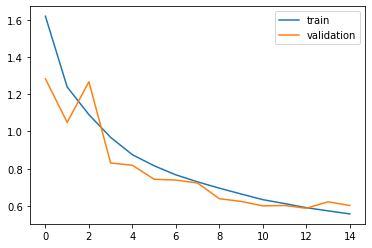

<Figure size 432x288 with 0 Axes>

In [126]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()
plt.savefig('trai_validation_loss')

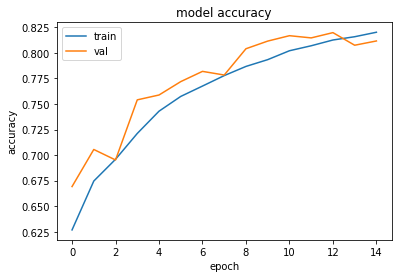

<Figure size 432x288 with 0 Axes>

In [127]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('trai_validation_accuracy')

In [51]:
from keras.models import load_model

In [105]:
# Load the Best Model

model = load_model('NMT_model.hdf5')

In [106]:
hindi_tensor_test.reshape((hindi_tensor_test.shape[0],hindi_tensor_test.shape[1]))

array([[ 2, 46, 51, ...,  0,  0,  0],
       [ 2, 46, 47, ...,  0,  0,  0],
       [ 2, 15, 47, ...,  0,  0,  0],
       ...,
       [ 2, 40, 47, ...,  0,  0,  0],
       [ 2, 38, 33, ...,  0,  0,  0],
       [ 2, 17, 27, ...,  0,  0,  0]], dtype=int32)

In [107]:
hinglish_tensor_predicted = model.predict_classes(hindi_tensor_test.reshape((hindi_tensor_test.shape[0],hindi_tensor_test.shape[1])))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [108]:
hinglish_tensor_predicted

array([[ 3, 11, 18, ...,  0,  0,  0],
       [ 3, 11,  4, ...,  0,  0,  0],
       [ 3, 14,  4, ...,  0,  0,  0],
       ...,
       [ 3, 21,  4, ...,  0,  0,  0],
       [ 3, 16,  4, ...,  0,  0,  0],
       [ 3, 10,  4, ...,  0,  0,  0]])

In [109]:
hinglish_int_to_vocab

{0: '<pad>',
 1: '#',
 2: '.',
 3: '@',
 4: 'a',
 5: 'b',
 6: 'c',
 7: 'd',
 8: 'e',
 9: 'f',
 10: 'g',
 11: 'h',
 12: 'i',
 13: 'j',
 14: 'k',
 15: 'l',
 16: 'm',
 17: 'n',
 18: 'o',
 19: 'p',
 20: 'q',
 21: 'r',
 22: 's',
 23: 't',
 24: 'u',
 25: 'v',
 26: 'w',
 27: 'x',
 28: 'y',
 29: 'z'}

In [110]:
hinglish_int_to_vocab[0]

'<pad>'

In [111]:
hinglish_tensor_test[0]

array([ 3, 11, 18, 21,  4,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0], dtype=int32)

In [112]:
hinglish_tensor_predicted

array([[ 3, 11, 18, ...,  0,  0,  0],
       [ 3, 11,  4, ...,  0,  0,  0],
       [ 3, 14,  4, ...,  0,  0,  0],
       ...,
       [ 3, 21,  4, ...,  0,  0,  0],
       [ 3, 16,  4, ...,  0,  0,  0],
       [ 3, 10,  4, ...,  0,  0,  0]])

In [113]:
hinglish_tensor_test.shape

(1492, 20)

In [114]:
hinglish_tensor_predicted.shape

(1492, 20)

# Evaluating test function

In [115]:
m = tf.keras.metrics.Accuracy()
m.update_state(hinglish_tensor_test, hinglish_tensor_predicted)
m.result().numpy()

0.82114613

In [116]:
a = hinglish_tensor_predicted[0]

In [117]:
hinglish_int_to_vocab

{0: '<pad>',
 1: '#',
 2: '.',
 3: '@',
 4: 'a',
 5: 'b',
 6: 'c',
 7: 'd',
 8: 'e',
 9: 'f',
 10: 'g',
 11: 'h',
 12: 'i',
 13: 'j',
 14: 'k',
 15: 'l',
 16: 'm',
 17: 'n',
 18: 'o',
 19: 'p',
 20: 'q',
 21: 'r',
 22: 's',
 23: 't',
 24: 'u',
 25: 'v',
 26: 'w',
 27: 'x',
 28: 'y',
 29: 'z'}

In [121]:
word_pred = []
for i in a:
  word_pred.append(hinglish_int_to_vocab[i])


In [122]:
word_pred

['@',
 'h',
 'o',
 'r',
 'a',
 '#',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>']

In [123]:
word_true = []
for i in hinglish_tensor_test[0]:
  word_true.append(hinglish_int_to_vocab[i])

In [124]:
word_true

['@',
 'h',
 'o',
 'r',
 'a',
 '#',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>']

In [125]:
print(word_true)
print(word_pred)

['@', 'h', 'o', 'r', 'a', '#', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
['@', 'h', 'o', 'r', 'a', '#', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']


In [ ]:
model.get_weights()